# > **Import Libraries**

In [1]:
import requests
from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
from collections import Counter

In [2]:
nltk.download('punkt')
nltk.download('wordnet', force=True)
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# > **Get Data from HTML URL**

In [3]:
def extract_text_from_html(url):
    url = url.strip('"')

    # Send a GET request to the URL
    response = requests.get(url)

    soup = BeautifulSoup(response.content, 'html.parser')

    text = ""
    for paragraph in soup.find_all(['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6']):
        text += " " + paragraph.get_text()

    return text

In [4]:
url = 'https://en.wikipedia.org/wiki/Mohamed_Salah'
text = extract_text_from_html(url)
text

' Contents Mohamed Salah \n Mohamed Salah Hamed Mahrous Ghaly (Arabic: محمد صلاح حامد محروس غالي, Egyptian Arabic pronunciation: [mæˈħam.mæd sˤɑˈlɑːħ ˈɣæːli];[5] born 15 June 1992), known as Mohamed Salah or Mo Salah, is an Egyptian professional footballer who plays as a right winger or forward for Premier League club Liverpool and captains the Egypt national team. Regarded as one of the best players of his generation and among the greatest African players of all time, he is known for his clinical finishing, dribbling and speed.[6][7][8]\n Salah started his senior career in 2010 playing for Al Mokawloon Al Arab, departing in 2012 to join Basel, where he won two Swiss Super League titles. In 2014, Salah joined Chelsea for a reported fee of £11\xa0million, but limited gametime led to successive loans to Fiorentina and Roma, who later signed him permanently for €15\xa0million. In the 2016–17 season, Salah was a key figure in Roma\'s unsuccessful title bid, reaching double figures in both 

# > **Data Preprocessing**

In [5]:
# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

In [6]:
def process_text(text):
    # Cleaning data from each symbol or character doesn’t contain to the data
    text = re.sub(r'[^\w\s]', '', text)

    # Normalization: make all the data to lower case
    text = text.lower()

    # Tokenization: split the data to words
    words = word_tokenize(text)

    # Lemmatization using SpaCy
    lemmatized_words = []
    for word in words:
        lemma = nlp(word)[0].lemma_
        lemmatized_words.append(lemma)

    # Stop words removal
    stop_words = set(stopwords.words('english'))
    lemmatized_words = [word for word in lemmatized_words if word not in stop_words]

    return lemmatized_words

In [7]:
words = process_text(text)
words

['content',
 'mohame',
 'salah',
 'mohame',
 'salah',
 'ham',
 'mahrous',
 'ghaly',
 'arabic',
 'محمد',
 'صلاح',
 'حامد',
 'محروس',
 'غالي',
 'egyptian',
 'arabic',
 'pronunciation',
 'mæˈħammæd',
 'sˤɑˈlɑːħ',
 'ˈɣæːli5',
 'bear',
 '15',
 'june',
 '1992',
 'know',
 'mohame',
 'salah',
 'mo',
 'salah',
 'egyptian',
 'professional',
 'footballer',
 'play',
 'right',
 'winger',
 'forward',
 'premier',
 'league',
 'club',
 'liverpool',
 'captain',
 'egypt',
 'national',
 'team',
 'regard',
 'one',
 'good',
 'player',
 'generation',
 'among',
 'great',
 'african',
 'player',
 'time',
 'know',
 'clinical',
 'finish',
 'dribble',
 'speed678',
 'salah',
 'start',
 'senior',
 'career',
 '2010',
 'play',
 'al',
 'mokawloon',
 'al',
 'arab',
 'depart',
 '2012',
 'join',
 'basel',
 'win',
 'two',
 'swiss',
 'super',
 'league',
 'title',
 '2014',
 'salah',
 'join',
 'chelsea',
 'report',
 'fee',
 '11',
 'million',
 'limit',
 'gametime',
 'lead',
 'successive',
 'loan',
 'fiorentina',
 'roma',
 'lat

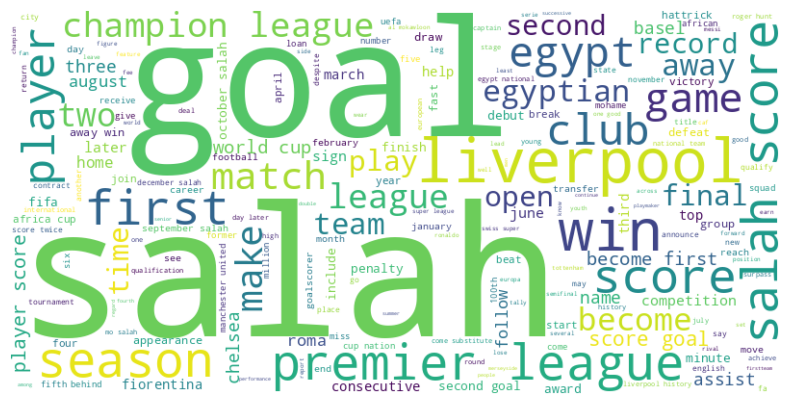

In [8]:
def generate_wordcloud(words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Call the function to generate and display the word cloud
generate_wordcloud(words)

# > **Get Unique Words**

In [9]:
unique_words = set(words)
unique_words

{'milestone',
 'however',
 'before276277282',
 'arsenal',
 '198687184',
 '1922',
 '1992',
 'tel',
 '201415',
 'talk',
 'sam',
 'ambrosio',
 'client',
 'salvage',
 '20152016',
 'threehour',
 'season127',
 'wayne',
 'beckham',
 '21236',
 'widely',
 'غالي',
 'george',
 'cite',
 'advertisement',
 'I',
 'english306',
 'status',
 'golden',
 'help',
 'boot129',
 '1',
 'squad',
 'thun',
 'consecutive',
 'people317',
 'saved263',
 'jeddah',
 'jakobpark',
 'previous',
 'mokawloon',
 'campaigns187',
 'next',
 'cup',
 'west',
 'stadium221',
 '1895121',
 'title40',
 'fouryear',
 'police',
 'loan',
 '20212022',
 'spend',
 'bbc',
 'although',
 'row197198',
 'pitch',
 '1062',
 'italian',
 'ultimately',
 'aggregate',
 'mobile',
 'uruguay',
 'political',
 'degree',
 'roberto',
 '41',
 '13',
 'goal',
 'publicly',
 'issa',
 '6',
 'approximately',
 'pogba',
 'yard',
 'register',
 'basel',
 'historic',
 'lot',
 'social',
 'fourth',
 '201516',
 'pose',
 'say',
 'penalty',
 'early',
 'image',
 'education',
 '

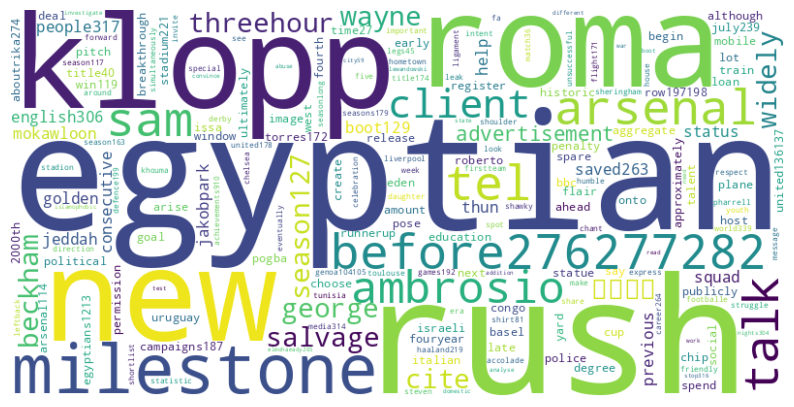

In [10]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(unique_words))

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<ipython-input-11-18f62172fd95>:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


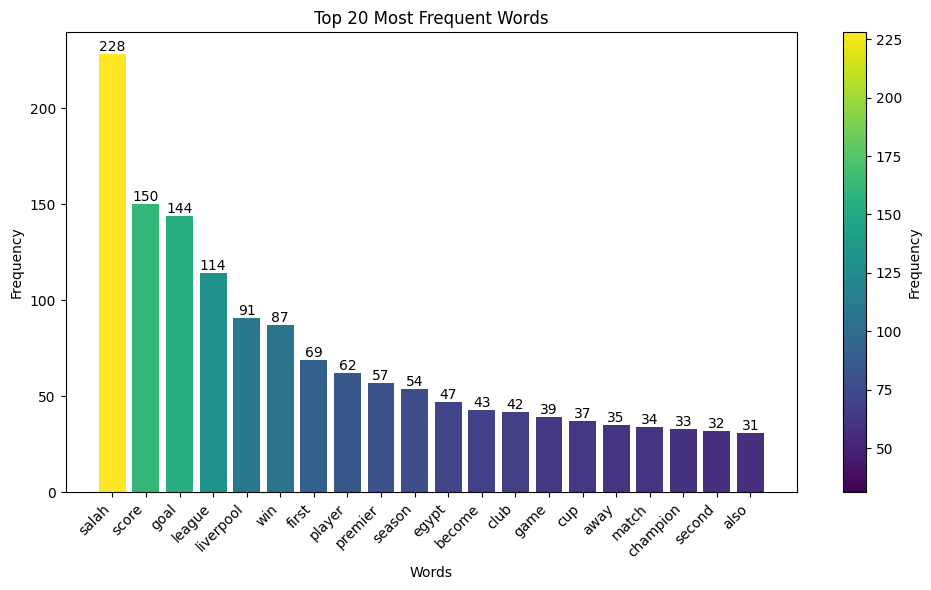

In [11]:
# Count the frequency of each unique word
word_freq = {word: words.count(word) for word in unique_words}

# Sort the words based on their frequency
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the top N words and their frequencies for plotting
top_words = [pair[0] for pair in sorted_word_freq[:20]]  # Change 20 to however many top words you want to display
top_freqs = [pair[1] for pair in sorted_word_freq[:20]]

# Assigning colors based on frequency
colors = [plt.cm.viridis(i / max(top_freqs)) for i in top_freqs]

# Create a bar plot with colorful bars
plt.figure(figsize=(10, 6))
bars = plt.bar(top_words, top_freqs, color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')

# Customizing x-axis labels rotation
plt.xticks(rotation=45, ha='right')

# Adding colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(top_freqs), vmax=max(top_freqs)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Frequency')

# Adding annotations for each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


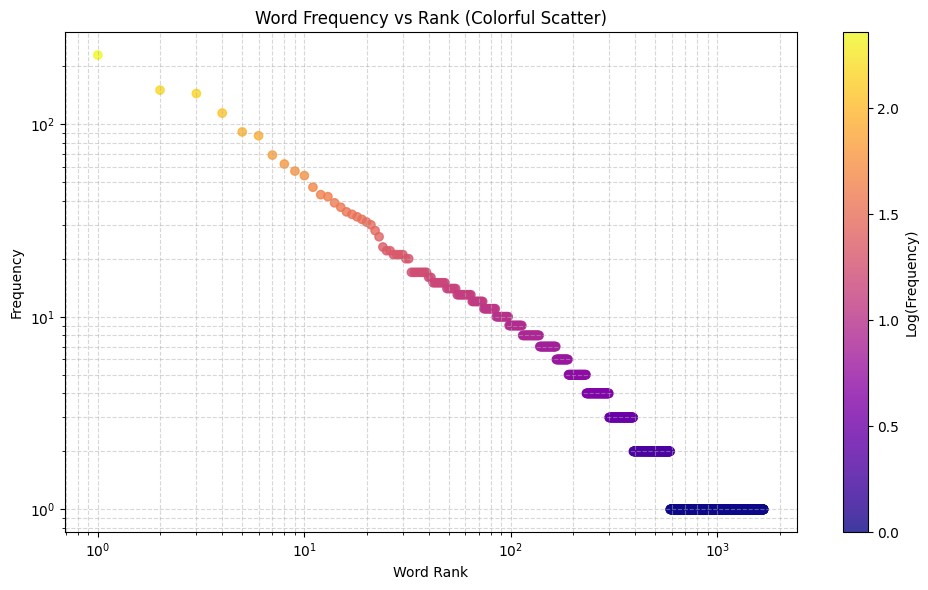

In [12]:
# Count the frequency of each word
word_counts = Counter(words)

# Sort the words based on their frequency
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract frequencies and their corresponding ranks (indices)
frequencies = [pair[1] for pair in sorted_word_counts]
ranks = range(1, len(frequencies) + 1)

# Define colors for points based on frequencies
# You can customize the color scheme as per your preference
colors = np.log10(frequencies)  # Using logarithmic scale for better color distribution

# Create a colorful scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ranks, frequencies, c=colors, cmap='plasma', alpha=0.8)
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Word Frequency vs Rank (Colorful Scatter)')
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.colorbar(label='Log(Frequency)')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()